In [1]:
import pandas as pd
import datetime as dt

In [2]:
market_list1 = pd.read_csv('Abuja_Branch.csv')
market_list2 = pd.read_csv('Lagos_Branch.csv')
market_list3 = pd.read_csv('Port_Harcourt_Branch.csv')

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [73]:
main_list = pd.concat([market_list1, market_list2, market_list3])

# *Data exploration*

In [74]:
main_list.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [75]:
main_list.shape

(1000, 17)

In [76]:
column_list = pd.DataFrame(main_list.columns)

In [77]:
column_list

,0
0,Invoice ID
1,Branch
2,City
3,Customer type
4,Gender
5,Product line
6,Unit price
7,Quantity
8,Tax 5%
9,Total


In [78]:
main_list.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


### Observation drawn from data description

* A minimum, mean and maximum review of 4, 6.9727 and 10 respectively implies that most of the customers were satisfied with the services rendered. a **STD(Standard Deviation)** of 1.71858 implies most ratings were within the range of 6-8.


* The insignificant value of the **STD** for the *Gross Margin Percentage* implies that it is almost constant for all entries.


* The **COGS(Cost Of Goods Sold)** is derived from the diffrence between the total and the 5% tax paid.


* The huge gap between the minimum and maximum gross income implies either a huge decline or imporovement in revenue generation.

In [79]:
main_list.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
324,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
main_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

The above result implies there are no null values and Date and Time columns are not of the appropriate datatypes.

# *Dealing with datetime features*

In [85]:
main_list['Date'] = pd.to_datetime(main_list['Date'])

In [86]:
main_list['Time'] = pd.to_datetime(main_list['Time'])


In [87]:
main_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [88]:
main_list['Day'] = main_list['Date'].dt.day

In [89]:
main_list['Month']= main_list['Date'].dt.month

In [90]:
main_list['Year']= main_list['Date'].dt.year

In [91]:
main_list['Hour'] = main_list['Time'].dt.hour

In [110]:
main_list

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-05-13 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-05-13 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-05-13 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-05-13 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-05-13 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,...,2021-05-13 10:33:00,Cash,251899.2,4.761905,12594.96,6.1,23,1,2019,10
324,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,...,2021-05-13 11:40:00,Cash,242852.4,4.761905,12142.62,6.0,9,1,2019,11
325,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,...,2021-05-13 19:12:00,Epay,296424.0,4.761905,14821.20,4.3,29,3,2019,19
326,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,...,2021-05-13 11:40:00,Epay,21942.0,4.761905,1097.10,5.9,18,2,2019,11


In [21]:
number_of_unique_hours= main_list['Hour'].nunique()
print(number_of_unique_hours)

11


In [69]:
unique_sales_hours= main_list['Hour'].unique()
print(unique_sales_hours)

[13 18 17 16 15 10 12 19 14 11 20]


# *Unique values in columns*

In [23]:
categorical_columns = [col for col in main_list.columns
                       if main_list[col].dtype == 'object']
print(categorical_columns)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']


In [97]:
main_list['Invoice ID'].unique().tolist()

['692-92-5582',
 '351-62-0822',
 '529-56-3974',
 '299-46-1805',
 '319-50-3348',
 '371-85-5789',
 '273-16-6619',
 '649-29-6775',
 '145-94-9061',
 '871-79-8483',
 '149-71-6266',
 '640-49-2076',
 '777-82-7220',
 '280-35-5823',
 '354-25-5821',
 '132-32-9879',
 '370-41-7321',
 '727-46-3608',
 '669-54-1719',
 '616-24-2851',
 '242-55-6721',
 '347-34-2234',
 '853-23-2453',
 '109-28-2512',
 '510-95-6347',
 '847-38-7188',
 '318-68-5053',
 '152-08-9985',
 '766-85-7061',
 '733-01-9107',
 '716-39-1409',
 '479-26-8945',
 '227-78-1148',
 '291-32-1427',
 '659-65-8956',
 '378-24-2715',
 '219-22-9386',
 '268-27-6179',
 '549-84-7482',
 '191-10-6171',
 '695-51-0018',
 '590-83-4591',
 '241-72-9525',
 '262-47-2794',
 '608-96-3517',
 '279-74-2924',
 '307-85-2293',
 '743-04-1105',
 '423-57-2993',
 '548-46-9322',
 '505-02-0892',
 '316-55-4634',
 '608-27-6295',
 '414-12-7047',
 '895-66-0685',
 '305-14-0245',
 '732-04-5373',
 '284-34-9626',
 '437-58-8131',
 '641-43-2399',
 '542-41-0513',
 '875-46-5808',
 '394-43

In [98]:
main_list['City'].unique().tolist()

['Abuja', 'Lagos', 'Port Harcourt']

In [99]:
main_list['Customer type'].unique().tolist()

['Member', 'Normal']

In [100]:
main_list['Gender'].unique().tolist()

['Female', 'Male']

In [101]:
main_list['Product line'].unique().tolist()

['Food and beverages',
 'Fashion accessories',
 'Electronic accessories',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty']

In [104]:
main_list['Payment'].unique().tolist()

['Card', 'Epay', 'Cash']

In [105]:
print('Total number of unique values in the Invoice ID column: {}'
      .format(len(main_list['Invoice ID'].unique().tolist())))



print('Total number of unique values in the City column: {}'
      .format(len(main_list['City'].unique().tolist())))



print('Total number of unique values in the Customer type column: {}'
      .format(len(main_list['Customer type'].unique().tolist())))




print('Total number of unique values in the Gender column: {}'
      .format(len(main_list['Gender'].unique().tolist())))



print('Total number of unique values in the Product line column: {}'
      .format(len(main_list['Product line'].unique().tolist())))



print('Total number of unique values in the Payment column: {}'
      .format(len(main_list['Payment'].unique().tolist())))


Total number of unique values in the Invoice ID column: 1000
Total number of unique values in the City column: 3
Total number of unique values in the Customer type column: 2
Total number of unique values in the Gender column: 2
Total number of unique values in the Product line column: 6
Total number of unique values in the Payment column: 3


In [25]:
main_list['Invoice ID'].value_counts()

668-90-8900    1
242-55-6721    1
848-07-1692    1
220-68-6701    1
471-41-2823    1
              ..
441-94-7118    1
745-74-0715    1
220-28-1851    1
274-05-5470    1
238-49-0436    1
Name: Invoice ID, Length: 1000, dtype: int64

In [26]:
main_list['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [27]:
main_list['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [28]:
main_list['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [29]:
main_list['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [30]:
main_list['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [31]:
main_list['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

# *Aggregation with groupby*

In [37]:
City_Column = main_list.groupby('City')

In [38]:
City_Column.agg({'Tax 5%': ['sum', 'mean'],
                'gross income': ['sum', 'mean']})

Tax 5%              gross income             
                      sum         mean          sum         mean
City                                                            
Abuja          1820531.52  5483.528675   1820531.52  5483.528675
Lagos          1820577.78  5354.640529   1820577.78  5354.640529
Port Harcourt  1895463.54  5778.852256   1895463.54  5778.852256

In [39]:
City_Column['gross income'].max()

City
Abuja            17528.4
Lagos            17816.4
Port Harcourt    17874.0
Name: gross income, dtype: float64

### **Port Harcourt City has the highest total gross income**

In [41]:
City_Column.agg({'Unit price': ['mean', 'max', 'sum']})

Unit price                    
                       mean      max        sum
City                                           
Abuja          20037.339759  35985.6  6652396.8
Lagos          19721.107059  35938.8  6705176.4
Port Harcourt  20379.248780  35985.6  6684393.6

# *Data visualization*

Text(0.5, 1.0, 'Branch with the highest sales record')

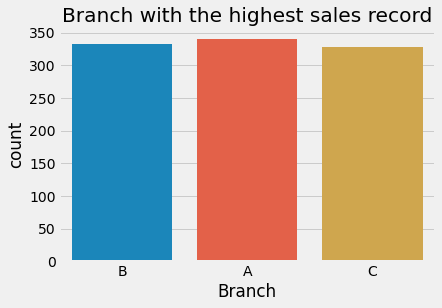

In [42]:
sns.countplot('Branch', data = main_list).set_title('Branch with the highest sales record')



Text(0.5, 1.0, 'Most used payment method')

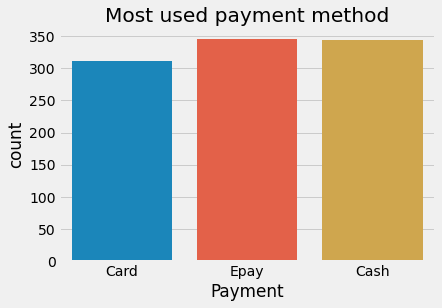

In [43]:
sns.countplot('Payment', data = main_list).set_title('Most used payment method')

Text(0.5, 1.0, 'City with the most sales')

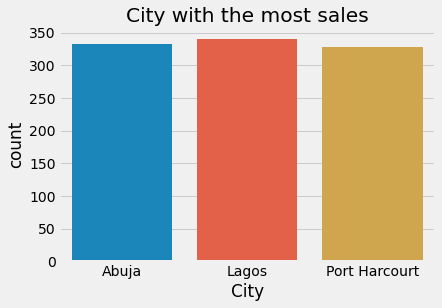

In [107]:
sns.countplot('City', data = main_list).set_title('City with the most sales')

Text(0.5, 1.0, 'Highest & lowest sold product line')

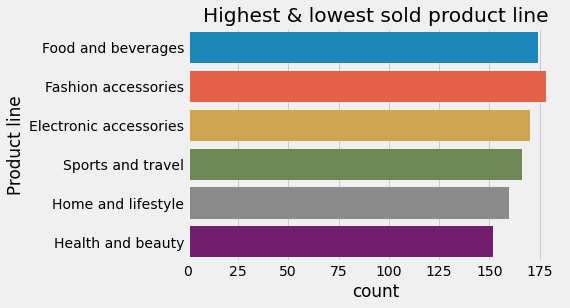

In [45]:
sns.countplot(y = 'Product line', data = main_list).set_title('Highest & lowest sold product line')

Text(0.5, 1.0, 'Most used payment channel for each product line')

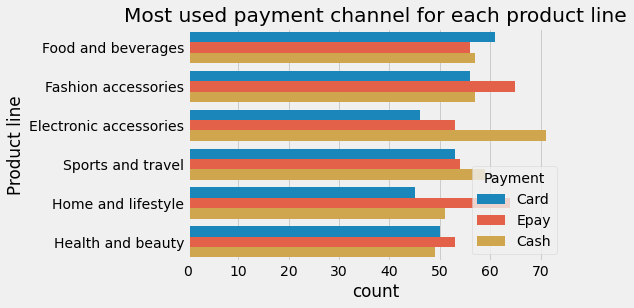

In [46]:
sns.countplot(y= 'Product line', hue= 'Payment', data = main_list).set_title('Most used payment channel for each product line')

Text(0.5, 1.0, 'Payment channel for each branch')

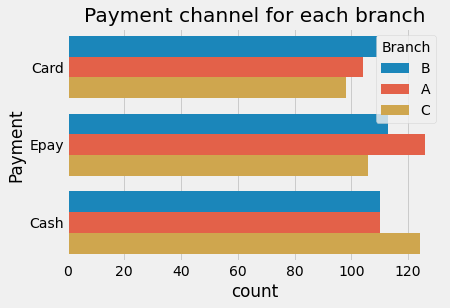

In [47]:
sns.countplot(y= 'Payment',hue= 'Branch', data= main_list).set_title('Payment channel for each branch')


Text(0.5, 1.0, 'Branch with lowest rating')

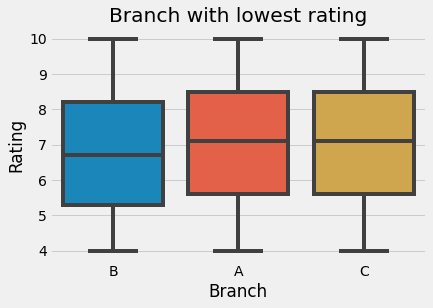

In [48]:
sns.boxplot(x='Branch', y= 'Rating', data= main_list).set_title('Branch with lowest rating')

Branch **B** has the lowest rating amongst all branches

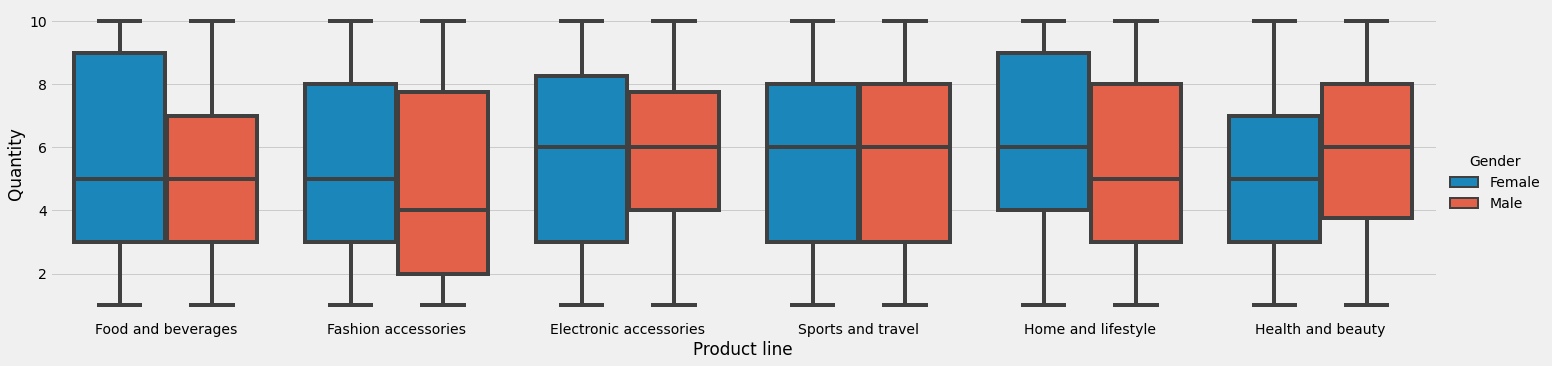

In [60]:
sns.catplot(x= 'Product line', y= 'Quantity', hue= 'Gender', data = main_list, kind= 'box', aspect= 4)

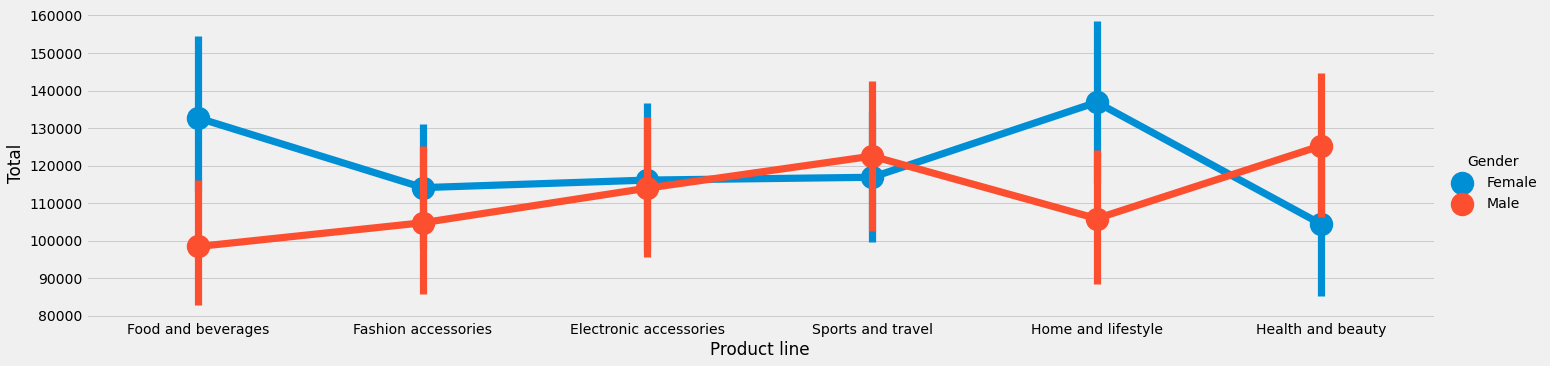

In [62]:
sns.catplot(x= 'Product line', y= 'Total', hue= 'Gender', data = main_list, kind= 'point', aspect= 4)

* From the above table is can be deduced that on the average, Females generate a higher total than Males.

* Females spend a lot more on **Food & beverages** and **Home & lifestyle**.

* Males have most dominance in the **Health and beauty** product line and also genreate more Total in the **Fashion & accessories** product line.

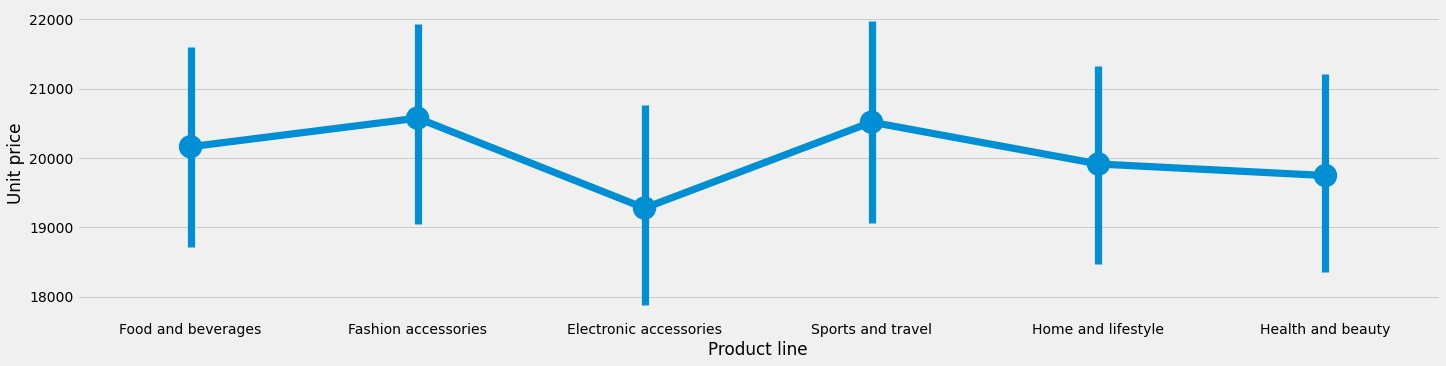

In [114]:
sns.catplot(x= 'Product line', y= 'Unit price', data = main_list, kind= 'point', aspect= 4)

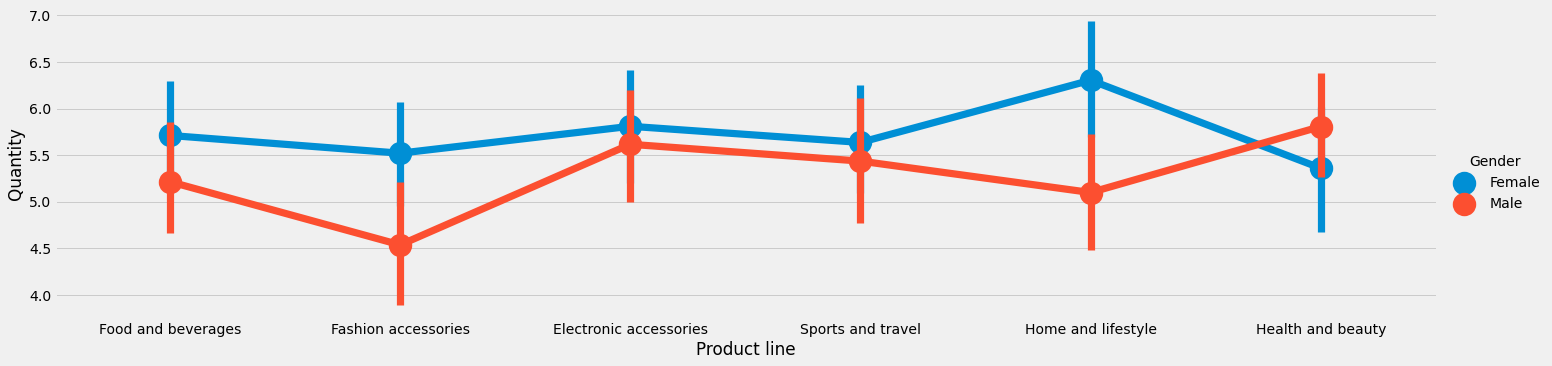

In [108]:
sns.catplot(x= 'Product line', y= 'Quantity', data = main_list, kind= 'point', aspect= 4, hue= 'Gender')

* **Fashion and Accessories** and **Sport and travel** product lines have more expensive items with **Electronic accessories** having the least expensive.



* **Electronic accessories** and **Home and lifestyle** product lines have more quantities per order aongst other product lines with **Fasion accessories** having the least quantity per order.

* It can also be deduced that the quantity per order varies inversely the **Unit price** of the items in the product lines.

# Experiment 1

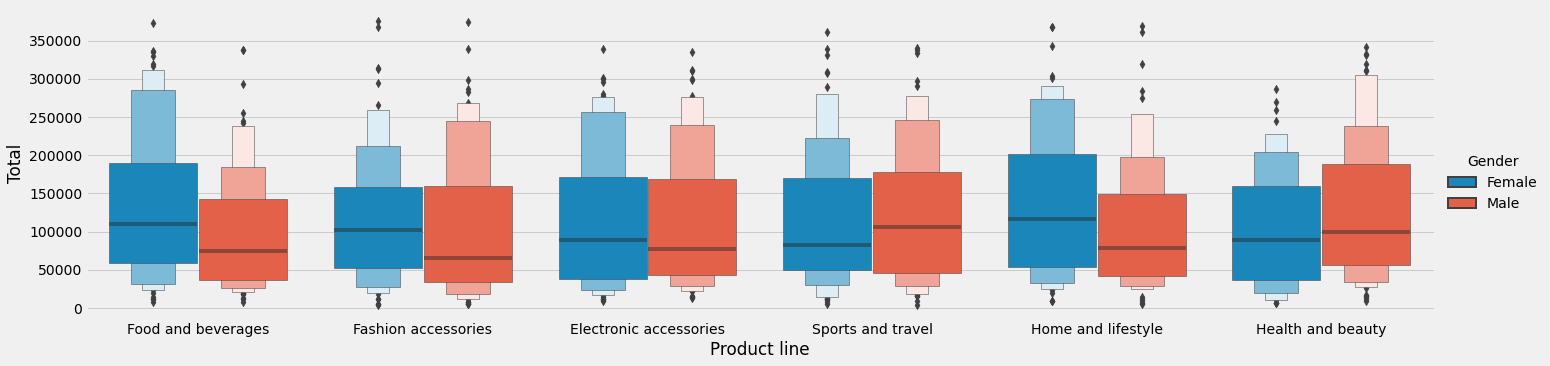

In [67]:
sns.catplot(x= 'Product line', y= 'Total', hue= 'Gender', data = main_list, kind= 'boxen', aspect= 4)

# Experiment 2

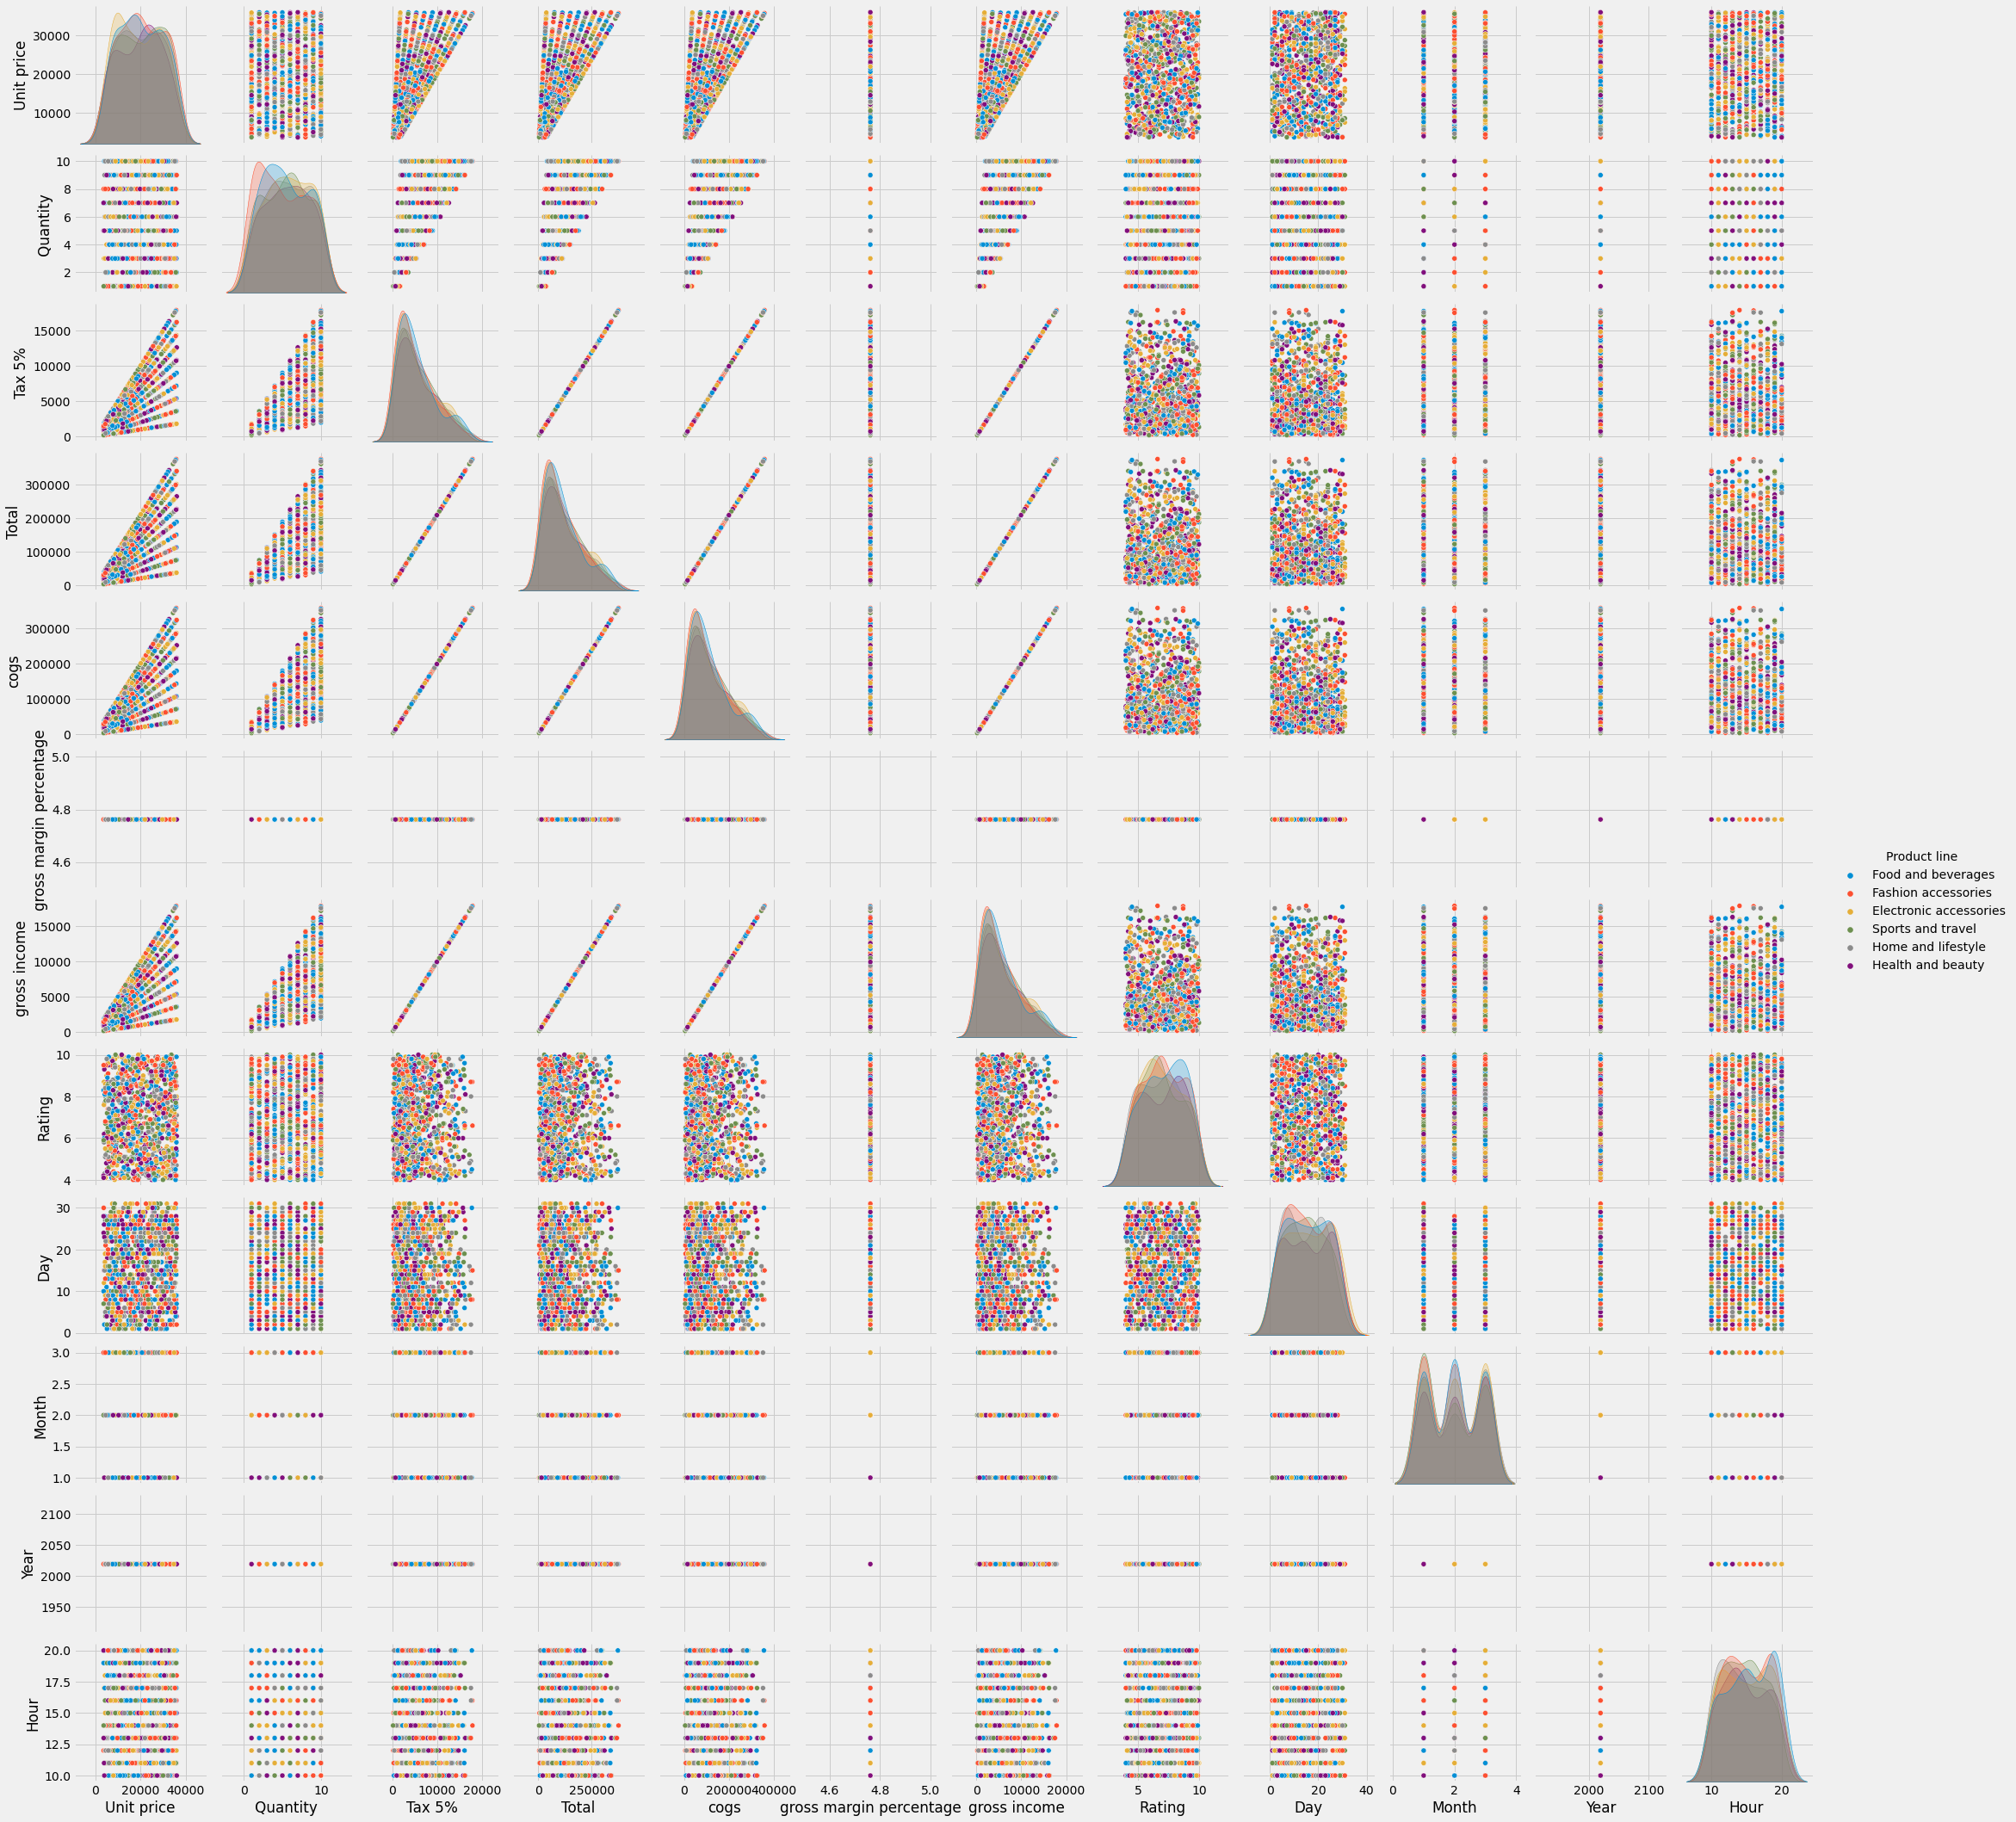

In [54]:
sns.pairplot(data= main_list, kind= 'scatter', hue= 'Product line')

# *StandOut Section*

* i went further to experiment with the catplot(kind= 'boxen') in **Experiment 1** to enable me visualize the values desnsity with respect to generated total across the  product line. Area with faintest color = lowest Total density and vice versa. this Method also indicates vividly, outliers as shown.

* i went further with **Experiment 2** to see how all columns compare to each other

*  these various forms of visualisation makes it easier to summarise large data to and easily readable form, especially with datasets with huge numerical columns as it saves one the energy and time of having to compute figures in ur head when making analysis which can make working with large datasets extremely tedious and rediculously slow.
